In [52]:
! pip install pandas matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
file=r'C:\Users\Admin\PycharmProjects\SQL_Lite(Task-7)\online_retail_II.csv'
try:
    df = pd.read_csv(file, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(file, encoding="latin1")
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom


In [14]:
conn=sqlite3.connect('sales_data.db')
df.to_sql('sales',conn,index=False)

525461

In [64]:
result=pd.read_sql_query('Select * from sales limit 10;',conn)
print(result)
conn.close()

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom  
2  12/1/2009 7:45   6.75      13085.0  United Kingdom  
3  12

In [20]:
with sqlite3.connect('sales_data.db') as conn:
    # Write the SQL command to select all records from the Students table
    select_query = "SELECT * FROM sales limit 10;"

    # Use pandas to read SQL query directly into a DataFrame
    result = pd.read_sql_query(select_query, conn)

# Display the DataFrame
print("All records as DataFrame:")
print(result)


All records as DataFrame:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom  
2  12/1/2009 7:45   6.75      13085

In [40]:
with sqlite3.connect('sales_data.db') as conn:
    cursor=conn.cursor()
    query='''UPDATE sales 
    SET Quantity = Quantity * -1 
    where Quantity<0 ;'''
    cursor.execute(query)
    print('query execute')
    conn.commit()

query execute


In [43]:
with sqlite3.connect('sales_data.db') as conn:
    cursor=conn.cursor()
    query='''UPDATE sales 
    SET Price = Price * -1 
    where Price<0 ;'''
    cursor.execute(query)
    print('query execute')
    conn.commit()

query execute


In [44]:
with sqlite3.connect('sales_data.db') as conn:
    query='''SELECT count(* ) as Total_negative
            From sales
            where Price<0 ;'''
    result=pd.read_sql_query(query,conn)
    print(result)

   Total_negative
0               0


In [45]:
with sqlite3.connect('sales_data.db') as conn:
    query='''SELECT count(* ) as Total_negative
            From sales
            where price<0 ;'''
    result=pd.read_sql_query(query,conn)
    print(result)

   Total_negative
0               0


In [46]:
with sqlite3.connect('sales_data.db') as conn:
    query='''SELECT *,(Quantity * price) as revenue
            From sales ;'''
    result=pd.read_sql_query(query,conn)
    print(result)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

            InvoiceDate  Price  Customer ID         Country  revenue  
0        12/1/2009 7:45   6.

In [48]:
with sqlite3.connect('sales_data.db') as conn:
    query='''SELECT StockCode, SUM(quantity) AS total_qty, SUM(quantity * price) AS
             revenue FROM sales GROUP BY StockCode ORDER BY 3 desc;'''
    result=pd.read_sql_query(query,conn)
    print(result)

     StockCode  total_qty    revenue
0            M       4213  540081.29
1        22423      14624  177105.56
2       85123A      59740  161356.22
3            B          3  136552.02
4          DOT       1235  116415.43
...        ...        ...        ...
4627     16131          1       0.00
4628    16065A          2       0.00
4629    15060A          8       0.00
4630     15002       1000       0.00
4631    10124C          5       0.00

[4632 rows x 3 columns]


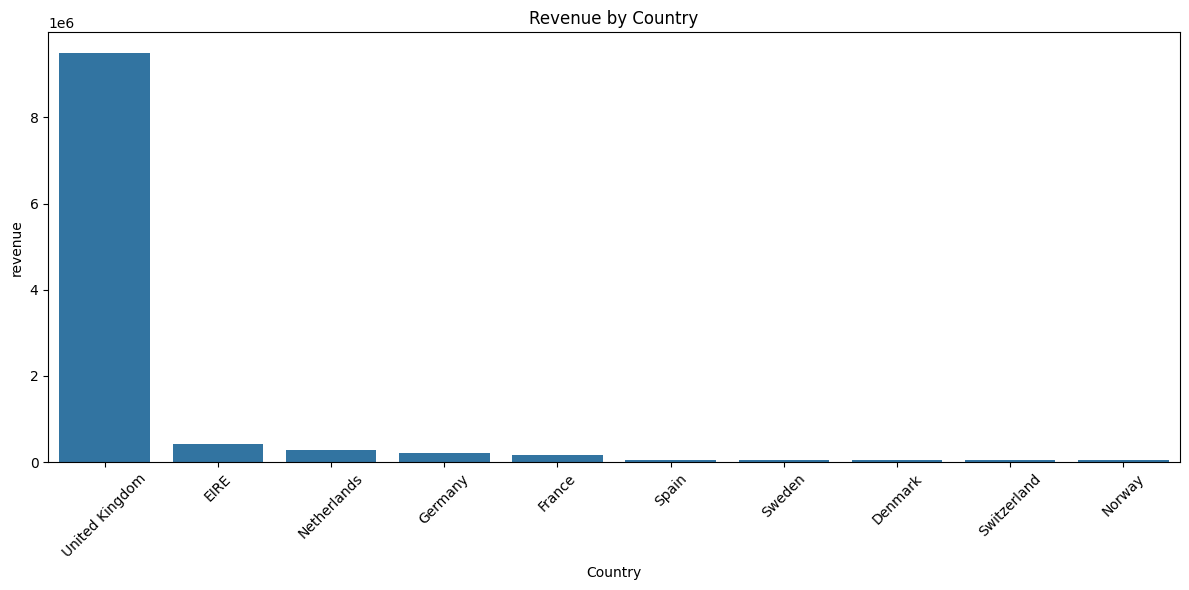

In [67]:
with sqlite3.connect('sales_data.db') as conn:
        query='''SELECT Country,sum(Quantity * price) as revenue
                From sales  group by 1  order by 2 desc limit 10 ;'''
        result=pd.read_sql_query(query,conn)
        plt.figure(figsize=(12, 6))
        sns.barplot(data=result, x="Country", y="revenue")
        plt.xticks(rotation=45)
        plt.title("Revenue by Country")
        plt.tight_layout()
        plt.show()